In [1]:
import sys  ###resetmcl1
sys.path.append('../scripts/')
from mcl import *

In [2]:
class ResetMcl(Mcl): 
    def __init__(self, envmap, init_pose, num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2}, \
                 distance_dev_rate=0.14, direction_dev=0.05):
        super().__init__(envmap, init_pose, num, motion_noise_stds, distance_dev_rate, direction_dev)
        self.alphas = {}  #α値の記録（ランドマークの観測数ごと）
        
    def observation_update(self, observation):
        for p in self.particles:
            p.observation_update(observation, self.map, self.distance_dev_rate, self.direction_dev) 
        
        #alpha値の記録
        alpha = sum([p.weight for p in self.particles])
        obsnum = len(observation)
        if not obsnum in self.alphas: self.alphas[obsnum] = []
        self.alphas[obsnum].append(alpha)
            
        self.set_ml()
        self.resampling() #ここで重みの合計は1になる

<IPython.core.display.Javascript object>


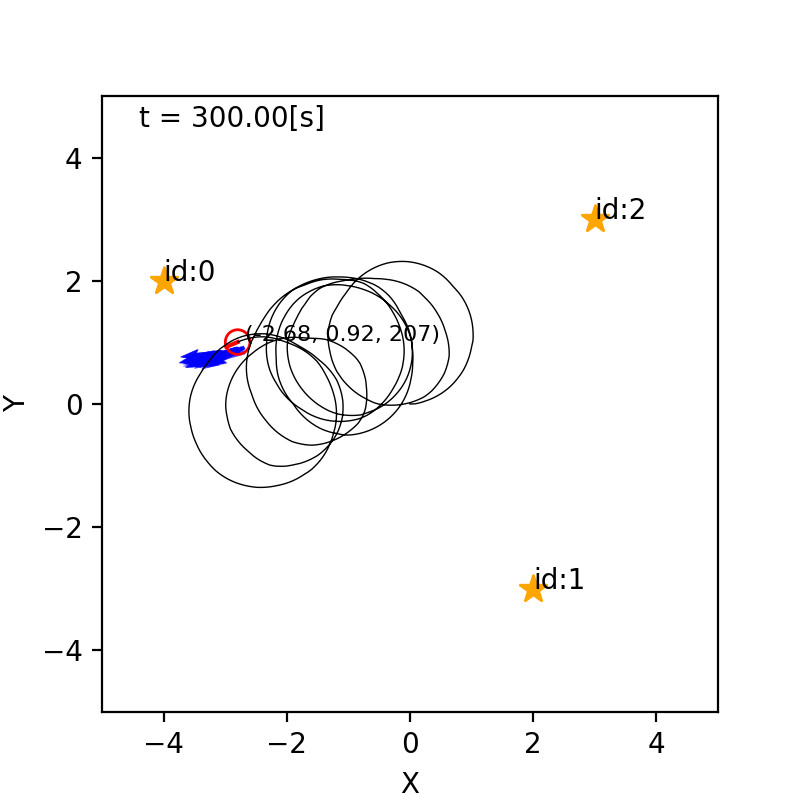

In [3]:
if __name__ == '__main__': 
    time_interval = 0.1
    world = World(300, time_interval) 

    ### 地図を生成して3つランドマークを追加 ###
    m = Map()                                  
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)          

    ### ロボットを作る ###
    initial_pose = np.array([0, 0, 0]).T
    pf = ResetMcl(m, initial_pose, 100)
    circling = MclAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(initial_pose, sensor=Camera(m), agent=circling, color="red")
    world.append(r)

    world.draw()

In [13]:
for num in pf.alphas: ###mclalpharesult
    print("landmarks:", num, "particles:", len(pf.particles), "min:", min(pf.alphas[num]), "max:", max(pf.alphas[num]))

landmarks: 2 particles: 100 min: 0.06649681532420512 max: 15.048305980704653
landmarks: 1 particles: 100 min: 0.010602797158344033 max: 9.792596137925328
landmarks: 0 particles: 100 min: 1.0000000000000007 max: 1.0000000000000007


<IPython.core.display.Javascript object>


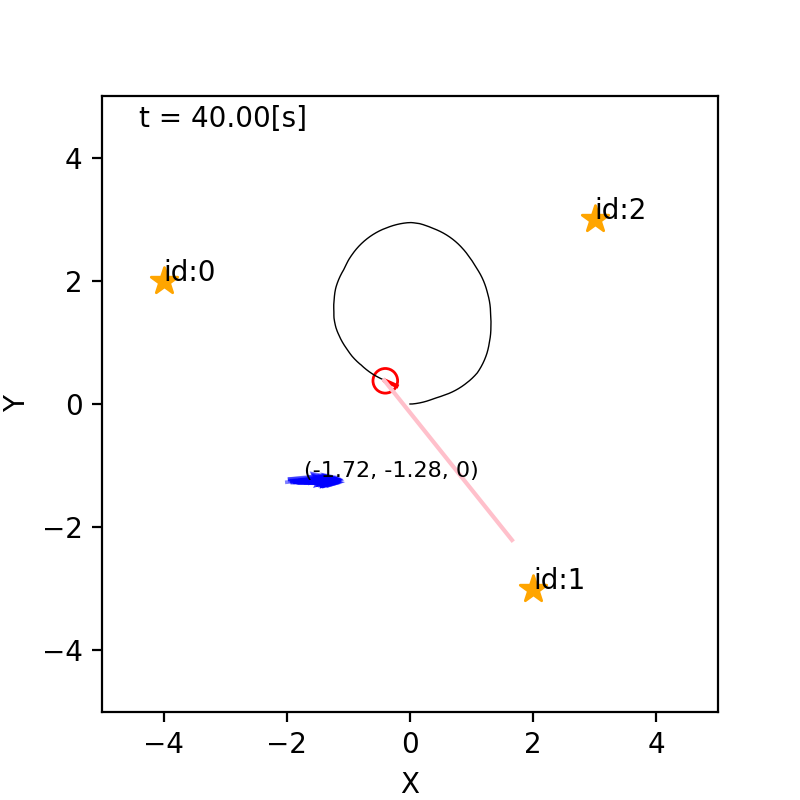

In [16]:
if __name__ == '__main__': 
    time_interval = 0.1
    world = World(40, time_interval) 

    ### 地図を生成して3つランドマークを追加 ###
    m = Map()                                  
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)          

    ### ロボットを作る ###
    pf = ResetMcl(m, np.array([-4, -4, 0]).T, 100)
    circling = MclAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(np.array([0,0,0]).T, sensor=Camera(m), agent=circling, color="red")
    world.append(r)

    world.draw()

In [17]:
for num in pf.alphas: ###mclalpharesult2
    print("landmarks:", num, "particles:", len(pf.particles), "min:", min(pf.alphas[num]), "max:", max(pf.alphas[num]))

landmarks: 2 particles: 100 min: 5.4060465318513694e-160 max: 4.0795492044285925e-126
landmarks: 1 particles: 100 min: 4.3006474545651544e-169 max: 6.118822142577356
landmarks: 0 particles: 100 min: 1.0000000000000007 max: 1.0000000000000007


In [18]:
pf.alphas

{2: [4.0795492044285925e-126, 5.4060465318513694e-160],
 1: [2.702499981551121e-106,
  0.00030535294878592277,
  1.8749185958223917e-05,
  2.8839419668433457e-05,
  0.0001054666985604399,
  5.678765123361649e-05,
  0.0008039930445327276,
  6.102886493019943e-05,
  0.00019827299974969304,
  1.5963682519577306e-05,
  1.4668375481092703e-05,
  3.841650804325688e-05,
  5.455491449192232e-06,
  3.4958310627175294e-05,
  5.229906896260562e-05,
  0.0001290620828373281,
  4.43105599421245e-05,
  5.7515650500790306e-05,
  2.5928168669410896e-06,
  3.338554524436153e-05,
  1.4826687443839351e-05,
  4.870676496893358e-05,
  4.397976125092195e-05,
  3.4312888800188226e-05,
  2.106118861979534e-05,
  0.00025694252014970154,
  3.5096213213907654e-05,
  2.6985580650371938e-06,
  1.2965603457291589e-05,
  4.885010237042281e-05,
  3.516675363652139e-05,
  9.105724342181254e-05,
  0.00029657631664759833,
  3.7605044103908415e-05,
  1.8489429632924674e-05,
  2.7950807274960748e-05,
  0.000140685345496688